In [86]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from mpl_toolkits import mplot3d

In [87]:
file_path = 'FINALDATA/WT_planktonic_final/track2_0_processed.txt'
data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['time', 'x', 'y', 'z', 'x_smooth', 'y_smooth', 'z_smooth'])
x_smooth = data['x_smooth']
y_smooth = data['y_smooth']
z_smooth = data['z_smooth']
time = data['time']
x = data['x'].values
y = data['y']
z = data['z']

In [88]:
window_length = 11
polyorder = 3

sg_x = savgol_filter(x, window_length, polyorder)
sg_y = savgol_filter(y, window_length, polyorder)
sg_z = savgol_filter(z, window_length, polyorder)

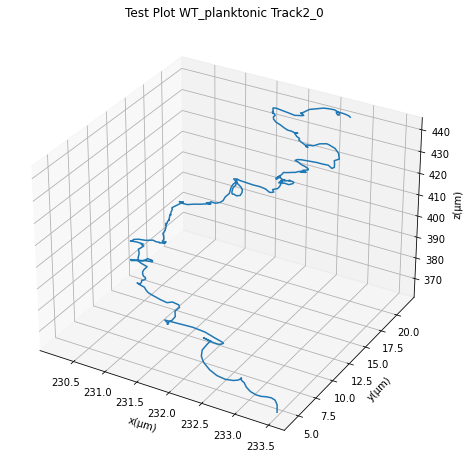

In [89]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.grid

ax.plot3D(sg_x, sg_y, sg_z)
ax.set_title('Test Plot WT_planktonic Track2_0')
ax.set_xlabel('x(µm)')
ax.set_ylabel('y(µm)')
ax.set_zlabel('z(µm)')


plt.show()

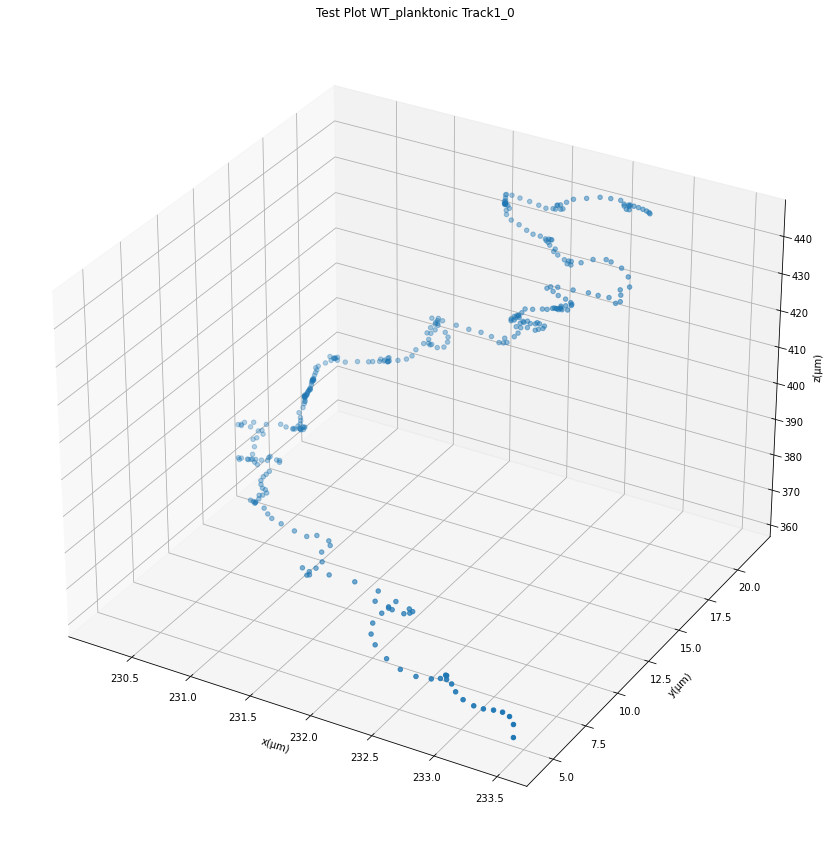

In [90]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')


scatter = ax.scatter(sg_x,sg_y,sg_z)

# Add color bar to show velocity scale

ax.set_title('Test Plot WT_planktonic Track1_0')
ax.set_xlabel('x(µm)')
ax.set_ylabel('y(µm)')
ax.set_zlabel('z(µm)')
#plt.savefig('/Users/ethanbrentnall/documents/0_Mphys_Project/plots/track1_0_WT_withv', dpi=300, bbox_inches='tight')
plt.show()

In [91]:
v_arr = np.zeros(len(data))
t_arr = np.zeros(len(data)-1)

for i in range(1,len(data)-1):
    #dt = 0.005
    t_next = time.iloc[i+1]
    x_next = sg_x[i+1]
    y_next = sg_y[i+1]
    z_next = sg_z[i+1]
    
    t_prev = time.iloc[i-1]
    x_prev = sg_x[i-1]
    y_prev = sg_y[i-1]
    z_prev = sg_z[i-1]
    
    # Calculate radial distance for next and previous points
     
    
    
    r_diff = np.sqrt((x_next-x_prev)**2+(y_next-y_prev)**2+(z_next-z_prev)**2)
    dt = np.round((t_next - t_prev),3)
   
  
    #velocity at the current point using central difference
    v = r_diff/ (dt)

    v_arr[i] = v
    t_arr[i]= dt

In [92]:
import plotly.graph_objects as go


fig = go.Figure(data=go.Scatter3d(x=sg_x,y=sg_y,z=sg_z, mode='markers', marker=dict(
        size=5, color=v_arr,  colorscale='Viridis', colorbar=dict(title=dict(text='Speed (µm s<sup>-1</sup>)',  
                font=dict(size=12)),titleside='right'),showscale=True,)))

# Add titles and labels
fig.update_layout(
    title='Test Plot WT_planktonic Track2_0',
    scene=dict(xaxis_title='x (µm)', yaxis_title='y (µm)', zaxis_title='z (µm)', aspectmode='cube'),
    width=800, height=800,)

# Show the plot
fig.show()

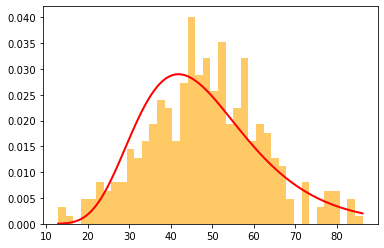

In [77]:
from scipy.stats import lognorm
no_of_bins = 40

velocity = v_arr
# Take out 1st and last value as they are 0
velocity_filtered = v_arr[1:-1]
shape, loc, scale = lognorm.fit(velocity_filtered, floc=0)
x = np.linspace(min(velocity_filtered), max(velocity_filtered), 100)
plt.hist(velocity_filtered, bins=no_of_bins, density=True, color='orange', alpha=0.6, label='Histogram')
pdf = lognorm.pdf(x, shape, loc, scale)
plt.plot(x, pdf, 'r-', lw=2, label='Log-normal fit')
mu = np.log(scale)  # Mean of the function
s = shape 
a=1
c=0


In [78]:
import numpy as np


# Create a histogram whihc I can extract values from
hist, bin_edges = np.histogram(v_arr, bins=no_of_bins, density=True)  # Adjust the number of bins as needed

# Calculate the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
density = hist
print("Bin Centers:", len(bin_centers))
print(len(density))

Bin Centers: 40
40


FITTING CAN GO AHEAD
3 parameters fitting with following initial guesses
mu = 3.831877931847275
sigma = 0.3130261249457785
c = 0
[3.89787026e+00 2.80824218e-01 2.71265762e-04]


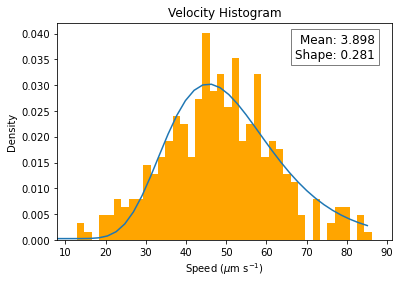

In [82]:
def fit_function(x,mu,sigma,c):  #x prefactor mean stddev const
    global args 
    args = fit_function.__code__.co_varnames
    return (1 / (x * sigma * np.sqrt(2 * np.pi))) * np.exp(-((np.log(x) - mu)**2) / (2 * sigma**2))+c  #lognormal func
guess = (mu , s, c ) #Initial guess values 
fit_function(1,*guess)

if len(args)-1 != len(guess):
    print('error, wrong number of guesses')
else:
    print('FITTING CAN GO AHEAD')
    print(len(args)-1, 'parameters fitting with following initial guesses')
    for i in range(len(guess)):
        print(args[i+1],"=", guess[i])
from scipy.optimize import curve_fit

para,covar=curve_fit(fit_function, bin_centers, density,  p0=guess)
print(para)
x_lognorm = bin_centers
y_lognorm = fit_function(x_lognorm, para[0],para[1],para[2])
plt.hist(velocity_filtered, bins=no_of_bins, density=True, color='orange')
plt.plot(x_lognorm,y_lognorm)
plt.xlim(min(velocity_filtered)-5, max(velocity_filtered)+5)
plt.title('Velocity Histogram')
plt.xlabel(r'Speed ($\mu$m s$^{-1}$)')
plt.ylabel('Density')
plt.text(0.95, 0.95, f'Mean: {np.round(para[0],3)}\nShape: {np.round(para[1],3)}', 
         horizontalalignment='right', verticalalignment='top', 
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.savefig(f'velo_plots/SG_TRACK2.png', format='png')
plt.show()